# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

A neuron computes a linear function (z = Wx + b) followed by an activation function.

####  2. Why we use non-linear activation funcitons in neural networks?

When use linear activation functions, several hidden layers are equal to only one hidden layer.

#### 3. What is the 'Logistic Loss' ?

**Cross-entropy:** <br>
p(x) and q(x) are probability distribution<br>
$H(p,q) = -\sum_{x} p(x)logq(x)$

**Logistic Loss:**<br>
$H(p,q) = -\sum_{x} p(x)logq(x) = -ylog\hat{y}-(1-y)log(1-\hat{y})$

**Logistic Loss is a special case (binary classification) of Cross-entropy.**

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

选C ： 输出为0~1之间的值，表示含有猫的概率

#### 5. Why we don't use zero initialization for all parameters ?

With forward propagation and backpropagation the output of all neurons is the same, which leads to the function of all neurons is the same and the gradient is not transferred.

#### 6. Can you implement the softmax function using python ? 

$$S_{i} = \frac{e^{V_{i}}}{\sum_{j} e^{V_{j}}}$$

In [46]:
import math
def softmax(x):
    x_exp = [math.exp(i) for i in x]
    print(x_exp)
    sum_x_exp = sum(x_exp)
    print(sum_x_exp)
    result = [round(i/sum_x_exp,3) for i in x_exp]
    return result

In [47]:
x = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]

In [48]:
softmax(x)

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897


[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [214]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [215]:
# Loading the data 
digits = datasets.load_digits()

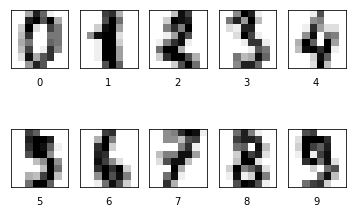

In [216]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [217]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [218]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [219]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [220]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [221]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1+np.exp(-z))
    
    return s

In [222]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [223]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = 0.
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [224]:
initialize_parameters(14)

(array([[ 0.31873685],
        [-1.47290965],
        [-0.28227672],
        [-1.10620458],
        [-0.27616352],
        [ 0.00853781],
        [ 0.12830177],
        [ 0.03033765],
        [-1.15805378],
        [ 0.72435258],
        [-0.61613646],
        [-0.51574545],
        [ 0.65639938],
        [-1.08425345]]), 0.0)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [225]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    #print('w:',w)
    m = X.shape[0] #样本数量
    A = sigmoid(np.dot(X,w)+b)
    #print('A.shape:',A.shape)
    #cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m #按公式这样写，但cost会出现nan的情况
    #Reference:https://blog.csdn.net/pan5431333/article/details/77606581
    cost = -np.sum(Y*np.log(A+ pow(10.0, -9))+(1-Y)*np.log(1-A+ pow(10.0, -9)))/m
    #print('cost',cost)
    dw = (1/m)*np.dot(X.T,A-Y) #(64,1)
    #print('dw.shape:',dw.shape)
    #print('dw:',dw)
    db = np.mean(A-Y)
    #print('db:',db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [255]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [256]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X,w)+b)
    
    for i in range(Y_prediction.shape[1]):
        if A[i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [262]:
from sklearn.utils import shuffle,resample
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=True):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    Y_train = Y_train.reshape(-1,1) #size(m,1)
    Y_test = Y_test.reshape(-1,1)
    #参数初始化
    row,col = X_train.shape
    w,b = initialize_parameters(col)
    #训练
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    #train_accuracy
    Y_train_predict = predict(params['w'], params['b'], X_train)
    n = sum(Y_train_predict.T==Y_train)
    train_acc = float(n/Y_train.shape[0])
    #test_accuracy
    Y_test_predict = predict(params['w'], params['b'], X_test)
    n = sum(Y_test_predict.T==Y_test)
    test_acc = float(n/Y_test.shape[0])
    print("train_acc={:.4f},test_accuracy={:.4f}".format(train_acc,test_acc))
    return costs,learning_rate,num_iterations,train_acc,test_acc

In [258]:
model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 9.486774
Cost after iteration 100: 8.573658
Cost after iteration 200: 7.807466
Cost after iteration 300: 7.124495
Cost after iteration 400: 6.443561
Cost after iteration 500: 5.764305
Cost after iteration 600: 5.160420
Cost after iteration 700: 4.677553
Cost after iteration 800: 4.278555
Cost after iteration 900: 3.932381
Cost after iteration 1000: 3.622247
Cost after iteration 1100: 3.347342
Cost after iteration 1200: 3.111026
Cost after iteration 1300: 2.904445
Cost after iteration 1400: 2.721394
Cost after iteration 1500: 2.558687
Cost after iteration 1600: 2.413952
Cost after iteration 1700: 2.285857
Cost after iteration 1800: 2.172630
Cost after iteration 1900: 2.071802
Cost after iteration 2000: 1.980806
Cost after iteration 2100: 1.897831
Cost after iteration 2200: 1.821805
Cost after iteration 2300: 1.752017
Cost after iteration 2400: 1.687817
Cost after iteration 2500: 1.628492
Cost after iteration 2600: 1.573294
Cost after iteration 2700: 1.521599
Cost

([9.486773912187488,
  8.573658148758556,
  7.8074661843182085,
  7.124494604993355,
  6.443560946607626,
  5.764304877551379,
  5.160420232462529,
  4.677552987154399,
  4.27855543330785,
  3.932381288714137,
  3.622246612207781,
  3.3473415454393107,
  3.111025859073355,
  2.9044453044916096,
  2.7213940592796035,
  2.5586873549766986,
  2.4139524783544832,
  2.2858574446030815,
  2.172630158575763,
  2.0718022523621666,
  1.9808064605409115,
  1.8978312717225803,
  1.8218050514269484,
  1.7520174866253735,
  1.687817418874265,
  1.6284918364650878,
  1.5732944886113986,
  1.5215990606882501,
  1.4730516267321867,
  1.427496068083787,
  1.3848179218096068,
  1.3448841187628586,
  1.3075235894826178,
  1.2725276679817559,
  1.2396836587927806,
  1.2088185173111257,
  1.1798044702571509,
  1.1525253489577463,
  1.1268551447213047,
  1.10267145111561,
  1.0798698289882647,
  1.0583586093777138,
  1.038046011078805,
  1.0188328152449142,
  1.0006140087850504,
  0.9832862594432368,
  0.96

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

train_accuracy=0.7179
test_accuracy=0.7156
train_accuracy=0.8671
test_accuracy=0.8133
train_accuracy=0.9094
test_accuracy=0.8711


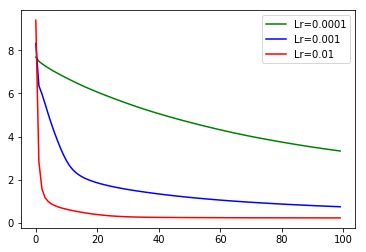

In [259]:
import matplotlib.pyplot as plt
costs1,Lr1,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.0001,print_cost=False)
plt.plot(range(len(costs1)),costs1,color='g',label="Lr="+str(Lr1))
costs2,Lr2,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.001,print_cost=False)
plt.plot(range(len(costs2)),costs2,color='b',label="Lr="+str(Lr2))
costs3,Lr3,_,_,_ = model(X_train, y_train, X_test, y_test, num_iterations=10000, learning_rate=0.01,print_cost=False)
plt.plot(range(len(costs3)),costs3,color='r',label="Lr="+str(Lr3))
plt.legend(loc='upper right')
plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [265]:
iters=[]
train_accs=[]
test_accs=[]
for i in range(1,10001):
    if i%100 == 0:
        _,_,iter,train_acc,test_acc = model(X_train, y_train, X_test, y_test, num_iterations=i, learning_rate=0.001,print_cost=False)
        iters.append(iter)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

train_acc=0.4915,test_accuracy=0.5178
train_acc=0.5264,test_accuracy=0.5444
train_acc=0.5338,test_accuracy=0.4844
train_acc=0.5568,test_accuracy=0.5400
train_acc=0.5761,test_accuracy=0.6000
train_acc=0.7283,test_accuracy=0.7022
train_acc=0.6993,test_accuracy=0.7044
train_acc=0.6088,test_accuracy=0.6178
train_acc=0.6355,test_accuracy=0.5911
train_acc=0.7906,test_accuracy=0.7289
train_acc=0.7498,test_accuracy=0.7200
train_acc=0.6422,test_accuracy=0.6289
train_acc=0.7476,test_accuracy=0.7333
train_acc=0.8233,test_accuracy=0.7978
train_acc=0.7216,test_accuracy=0.6933
train_acc=0.7409,test_accuracy=0.7200
train_acc=0.7365,test_accuracy=0.7244
train_acc=0.7817,test_accuracy=0.7556
train_acc=0.7610,test_accuracy=0.7178
train_acc=0.7869,test_accuracy=0.7578
train_acc=0.7773,test_accuracy=0.7400
train_acc=0.8018,test_accuracy=0.7889
train_acc=0.8018,test_accuracy=0.7867
train_acc=0.8099,test_accuracy=0.8022
train_acc=0.8270,test_accuracy=0.7822
train_acc=0.7869,test_accuracy=0.7622
train_acc=0.

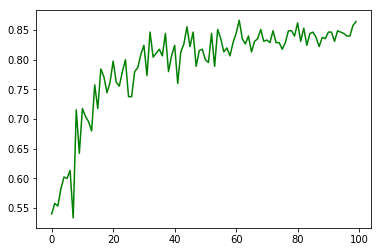

In [263]:
import matplotlib.pyplot as plt
plt.plot(range(len(test_accs)),test_accs,color='g',label="Lr="+str(Lr1))

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 